In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import resample
import seaborn as sns

In [2]:
chip1_data_acetone_1M = pd.read_csv('../data/Data collection/Chip-1/Acetone_1ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_acetone_100k = pd.read_csv('../data/Data collection/Chip-1/Acetone_1ppm_100k_300.csv', sep=';', decimal=',')
chip1_data_benzene_1M = pd.read_csv('../data/Data collection/Chip-1/Benzene_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_benzene_100k = pd.read_csv('../data/Data collection/Chip-1/Benzene_1.008ppm_100k_300.csv', sep=';', decimal=',')
chip1_data_methanol_1M = pd.read_csv('../data/Data collection/Chip-1/Methanol_1.04ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_methanol_100k = pd.read_csv('../data/Data collection/Chip-1/Methanol_1.04ppm_100k_300.csv', sep=';', decimal=',')
chip1_data_ethanol_1M = pd.read_csv('../data/Data collection/Chip-1/Ethanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_ethanol_100k = pd.read_csv('../data/Data collection/Chip-1/Ethanol_1.001ppm_100k_300.csv', sep=';', decimal=',')
chip1_data_ipa_1M = pd.read_csv('../data/Data collection/Chip-1/IPA_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip1_data_ipa_100k = pd.read_csv('../data/Data collection/Chip-1/IPA_1.008ppm_100k_300.csv', sep=';', decimal=',')

chip2_data_acetone_1M = pd.read_csv('../data/Data collection/Chip-2/Acetone_1ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_acetone_100k = pd.read_csv('../data/Data collection/Chip-2/Acetone_1ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_acetone_10k = pd.read_csv('../data/Data collection/Chip-2/Acetone_1ppm_10k_300.csv', sep=';', decimal=',')
chip2_data_benzene_1M = pd.read_csv('../data/Data collection/Chip-2/Benzene_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_benzene_100k = pd.read_csv('../data/Data collection/Chip-2/Benzene_1.008ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_benzene_10k = pd.read_csv('../data/Data collection/Chip-2/Benzene_1.008ppm_10k_300.csv', sep=';', decimal=',')
chip2_data_methanol_1M = pd.read_csv('../data/Data collection/Chip-2/Methanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_methanol_100k = pd.read_csv('../data/Data collection/Chip-2/Methanol_1.001ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_methanol_10k = pd.read_csv('../data/Data collection/Chip-2/Methanol_1.001ppm_10k_300.csv', sep=';', decimal=',')
chip2_data_ethanol_1M = pd.read_csv('../data/Data collection/Chip-2/Ethanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_ethanol_100k = pd.read_csv('../data/Data collection/Chip-2/Ethanol_1.001ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_ethanol_10k = pd.read_csv('../data/Data collection/Chip-2/Ethanol_1.001ppm_10k_300.csv', sep=';', decimal=',')
chip2_data_ipa_1M = pd.read_csv('../data/Data collection/Chip-2/IPA_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip2_data_ipa_100k = pd.read_csv('../data/Data collection/Chip-2/IPA_1.008ppm_100k_300.csv', sep=';', decimal=',')
chip2_data_ipa_10k = pd.read_csv('../data/Data collection/Chip-2/IPA_1.008ppm_10k_300.csv', sep=';', decimal=',')

chip3_data_acetone_1M = pd.read_csv('../data/Data collection/Chip-3/Acetone_1ppm_1M_300.csv', sep=';', decimal=',')
chip3_data_benzene_1M = pd.read_csv('../data/Data collection/Chip-3/Benzene_1.008ppm_1M_300.csv', sep=';', decimal=',')
chip3_data_methanol_1M = pd.read_csv('../data/Data collection/Chip-3/Methanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip3_data_ethanol_1M = pd.read_csv('../data/Data collection/Chip-3/Ethanol_1.001ppm_1M_300.csv', sep=';', decimal=',')
chip3_data_ipa_1M = pd.read_csv('../data/Data collection/Chip-3/IPA_1.008ppm_1M_300.csv', sep=';', decimal=',')

cols = [
'nico',
'nio5',
'ceo',
'coo',
'nio1',
'nio2',
'nio3',
'nio4',
'azo25',
'azo50',
'v2o55',
'v2o510',
'v2o550',
'v2o5',
'ito',
'zzo',
'azo1',
'azo6',
'azo7',
'gzo21',
]

In [3]:
def filt_sig(signal, const, threshold, win1=None, signal_cuts=None, win2=None, sig_plot=False):
    Y = np.fft.fft(signal)
    Y_filtered = Y.copy()
    Y_filtered[np.abs(np.fft.fftfreq(len(signal), d=1.0/const)) > threshold] = 0
    y_filtered = np.real(np.fft.ifft(Y_filtered))
    ma = y_filtered
    if win1!=None:
        ma = np.array(pd.DataFrame(ma).rolling(win1).mean().dropna()).squeeze()
    if signal_cuts!=None:
        ma = ma[ma<signal_cuts[0]]
        ma = ma[ma>signal_cuts[1]]
    if win2!=None:
        ma = np.array(pd.DataFrame(ma).rolling(win2).mean().dropna()).squeeze()
    if sig_plot:
        fig, axs = plt.subplots(1, 2, figsize=(10,3))
        axs = axs.flatten()
        plt.figure(figsize=(10, 6))
        axs[0].plot(signal)
        axs[0].plot(y_filtered)
        axs[0].plot(ma)
        axs[1].plot(ma)
        plt.show()
    return ma

def scatter_plot(data):
    plt.scatter(range(len(data)), data)

# Acetone

In [5]:
data1 = chip1_data_acetone_1M[['R8', 'R9', 'R15']][:4000]
data1 = data1[data1['R8']<2300]
data1 = data1[data1['R8']>1300]
data1 = data1[data1['R15']<1400]
data1 = data1.reset_index().drop('index', axis=1).squeeze()
data2 = chip1_data_acetone_100k[['R17', 'R14', 'R13', 'R12', 'R11']][:4000]
data3 = chip2_data_acetone_1M[['R14', 'R13']][:700]
data4 = chip2_data_acetone_10k[['R10', 'R9', 'R7', 'R11']][:700]
data5 = chip3_data_acetone_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
data5 = data5[data5['R3']<1600]
data5 = data5[data5['R3']>1100]
data5 = data5[data5['R11']<565]
data5 = data5[data5['R11']>500]
data5 = data5[data5['R15']<345]
data5 = data5[data5['R15']>305]
data5 = data5[:700]
data5 = data5.reset_index().drop('index', axis=1).squeeze()


data1 = pd.DataFrame(resample(data1, len(data3)), columns=data1.columns)
data2 = pd.DataFrame(resample(data2, len(data3)), columns=data2.columns)

In [6]:
acetone_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
acetone_data.columns = cols
acetone_data['ceo'] = filt_sig(acetone_data['ceo'], 400, 50)
acetone_data['gzo21'] = filt_sig(acetone_data['gzo21'], 500, 30)

# Benzene

In [7]:
data1 = chip1_data_benzene_1M[['R8', 'R9', 'R15']][:4000]
data1 = data1[data1['R8']<10000]
data1 = data1[data1['R9']<1400]
data1 = data1[data1['R15']<2500]
data1 = data1.reset_index().drop('index', axis=1).squeeze()
data2 = chip1_data_benzene_100k[['R17', 'R14', 'R13', 'R12', 'R11']]
data3 = chip2_data_benzene_1M[['R14', 'R13']][500:]
data3 = data3[data3['R13']<325]
data3 = data3.reset_index().drop('index', axis=1).squeeze()
data4 = chip2_data_benzene_10k[['R10', 'R9', 'R7', 'R11']][:4000]
data5 = chip3_data_benzene_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
data5 = data5[data5['R3']<1800]
data5 = data5[data5['R3']>1300]
data5 = data5[data5['R11']<580]
data5 = data5[data5['R11']>500]
data5 = data5[data5['R15']<350]
data5 = data5[data5['R15']>329]
data5 = data5.reset_index().drop('index', axis=1).squeeze()
data5 = data5[:700]

data1.replace([np.inf, -np.inf], np.nan, inplace=True) 
data1.dropna(inplace=True)

data1 = pd.DataFrame(resample(data1, len(data5)), columns=data1.columns)
data2 = pd.DataFrame(resample(data2, len(data5)), columns=data2.columns)
data3 = pd.DataFrame(resample(data3, len(data5)), columns=data3.columns)
data4 = pd.DataFrame(resample(data4, len(data5)), columns=data4.columns)

In [8]:
benzene_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
benzene_data.columns = cols
benzene_data['gzo21'] = filt_sig(benzene_data['gzo21'], 600, 50)

# Methanol

In [9]:
data1 = chip1_data_methanol_1M[['R8', 'R9', 'R15']][:5000]
data1 = data1[data1['R8']<2000]
data1 = data1[data1['R8']>1200]
data2 = chip1_data_methanol_100k[['R17', 'R14', 'R13', 'R12', 'R11']][:5000]
data3 = chip2_data_methanol_1M[['R14', 'R13']][:700]
data4 = chip2_data_methanol_10k[['R10', 'R9', 'R7', 'R11']]
data5 = chip3_data_methanol_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
data5 = data5[data5['R3']<2200]
data5 = data5[data5['R3']>1400]
data5 = data5[data5['R11']<600]
data5 = data5[data5['R11']>500]
data5 = data5[data5['R15']<400]
data5 = data5[data5['R15']>350]
data5 = data5.reset_index().drop('index', axis=1).squeeze()
data5 = data5[:700]

data1 = pd.DataFrame(resample(data1, len(data5)), columns=data1.columns)
data2 = pd.DataFrame(resample(data2, len(data5)), columns=data2.columns)
data4 = pd.DataFrame(resample(data4, len(data5)), columns=data4.columns)

In [10]:
methanol_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
methanol_data.columns = cols

methanol_data['zzo'] = filt_sig(methanol_data['zzo'], 700, 50)
replacement = methanol_data['zzo'][methanol_data['zzo']>1500]
replacement = replacement.reset_index().drop('index', axis=1).squeeze()
methanol_data['zzo'] = resample(replacement, 700)

# Ethanol

In [11]:
data1 = chip1_data_ethanol_1M[['R8', 'R9', 'R15']][:5000]
data1 = data1[data1['R8']<2500]
data1 = data1[data1['R8']>1500]
data1 = data1[data1['R15']<1200]
data1 = data1[data1['R15']>600]
data1 = data1.reset_index().drop('index', axis=1).squeeze()
data2 = chip1_data_ethanol_100k[['R17', 'R14', 'R13', 'R12', 'R11']]
data3 = chip2_data_ethanol_1M[['R14', 'R13']]
data3 = data3[data3['R13']<350]
data3 = data3[data3['R13']>305]
data3 = data3.reset_index().drop('index', axis=1).squeeze()
data4 = chip2_data_ethanol_10k[['R10', 'R9', 'R7', 'R11']][:600]
data5 = chip3_data_ethanol_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
data5 = data5[data5['R3']<2000]
data5 = data5[data5['R3']>1400]
data5 = data5[data5['R11']<560]
data5 = data5[data5['R11']>505]
data5 = data5[data5['R15']<395]
data5 = data5[data5['R15']>350]
data5 = data5.reset_index().drop('index', axis=1).squeeze()
data5 = data5[50:750]
data5 = data5.reset_index().drop('index', axis=1).squeeze()

data1 = pd.DataFrame(resample(data1, 700), columns=data1.columns)
data2 = pd.DataFrame(resample(data2, 700), columns=data2.columns)
data3 = pd.DataFrame(resample(data3, 700), columns=data3.columns)
data4 = pd.DataFrame(resample(data4, 700), columns=data4.columns)
data5 = pd.DataFrame(resample(data5, 700), columns=data5.columns)

In [12]:
ethanol_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
ethanol_data.columns = cols

# Isopropanol

In [13]:
data1 = chip1_data_ipa_1M[['R8', 'R9', 'R15']][:5000]
data1 = data1[data1['R8']<2500]
data1 = data1[data1['R15']<1100]
data1 = data1[data1['R15']>550]
data1 = data1.reset_index().drop('index', axis=1).squeeze()
data2 = chip1_data_ipa_100k[['R17', 'R14', 'R13', 'R12', 'R11']][1000:6000]
data2 = data2[data2['R11']<32]
data2 = data2[data2['R11']>31]
data2 = data2.reset_index().drop('index', axis=1).squeeze()
data3 = chip2_data_ipa_1M[['R14', 'R13']]
data3 = data3[data3['R13']<340]
data3 = data3.reset_index().drop('index', axis=1).squeeze()
data3 = data3[:700]
data4 = chip2_data_ipa_10k[['R10', 'R9', 'R7', 'R11']][:675]
data5 = chip3_data_ipa_1M[['R9', 'R3', 'R13', 'R11', 'R7', 'R15']]
data5 = data5[data5['R3']<2200]
data5 = data5[data5['R11']<590]
data5 = data5[data5['R11']>490]
data5 = data5[data5['R15']<405]
data5 = data5[data5['R15']>355]
data5 = data5.reset_index().drop('index', axis=1).squeeze()
data5 = data5[:700]

data1 = pd.DataFrame(resample(data1, len(data5)), columns=data1.columns)
data2 = pd.DataFrame(resample(data2, len(data5)), columns=data2.columns)
data4 = pd.DataFrame(resample(data4, len(data5)), columns=data4.columns)

In [14]:
ipa_data = pd.concat([data1, data2, data3, data4, data5], ignore_index=True, axis=1)
ipa_data.columns = cols

ipa_data['zzo'] = filt_sig(ipa_data['zzo'], 900, 50)
ipa_data['azo6'] = filt_sig(ipa_data['azo6'], 500, 25)
replacement = filt_sig(ipa_data['gzo21'], 500, 20, win1=40)
ipa_data['gzo21'] = resample(replacement, 700)

# Full plot

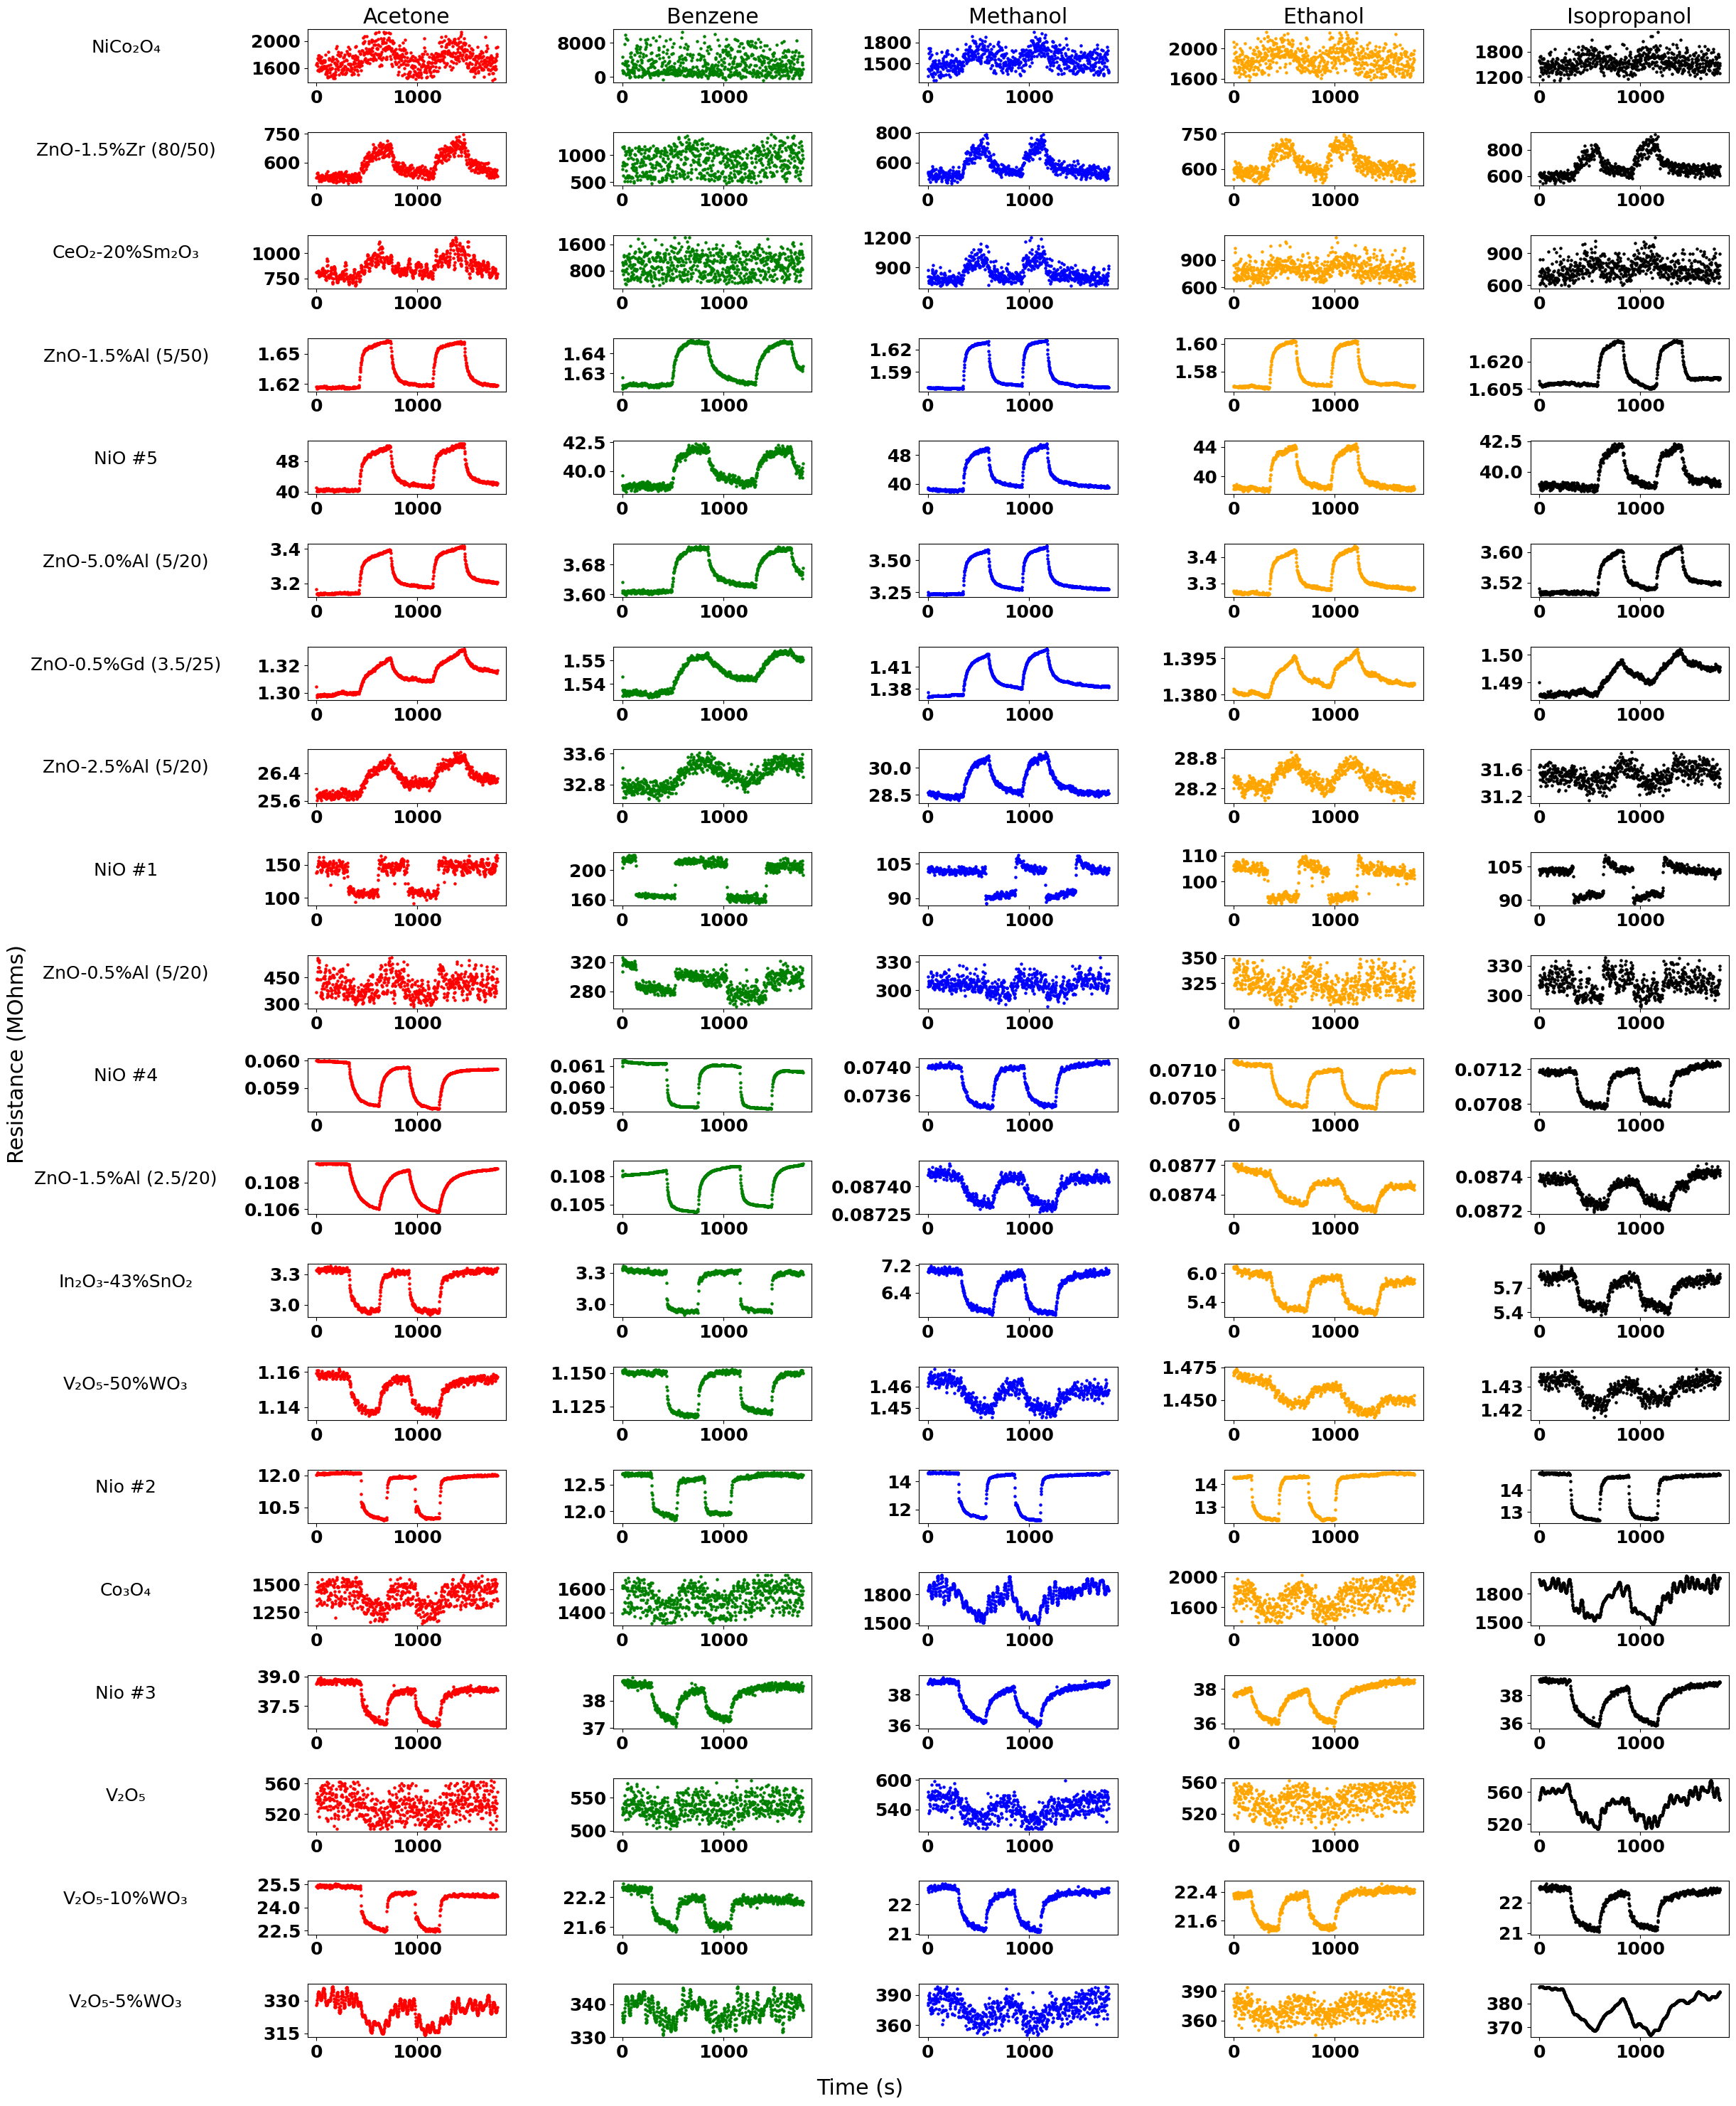

In [91]:
from matplotlib.ticker import FormatStrFormatter
full_data = [acetone_data, benzene_data, methanol_data, ethanol_data, ipa_data]
fig, axs = plt.subplots(acetone_data.shape[1], 5, figsize=(25,30))
axs = axs.T
analytes = ['Acetone', 'Benzene', 'Methanol', 'Ethanol', 'Isopropanol']
colors = ['r', 'g', 'b', 'orange', 'black']

materials = [
    'NiCo\u2082O\u2084',
    'ZnO-1.5%Zr (80/50)',
    'CeO\u2082-20%Sm\u2082O\u2083',
    'ZnO-1.5%Al (5/50)',
    'NiO #5',
    'ZnO-5.0%Al (5/20)',
    'ZnO-0.5%Gd (3.5/25)',
    'ZnO-2.5%Al (5/20)',
    'NiO #1',
    'ZnO-0.5%Al (5/20)',
    'NiO #4',
    'ZnO-1.5%Al (2.5/20)',
    'In\u2082O\u2083-43%SnO\u2082',
    'V\u2082O\u2085-50%WO\u2083',
    'Nio #2',
    'Co\u2083O\u2084',
    'Nio #3',
    'V\u2082O\u2085',
    'V\u2082O\u2085-10%WO\u2083',
    'V\u2082O\u2085-5%WO\u2083'
]
plt.rcParams.update({'font.size':18})
plt.rcParams["font.weight"] = "bold"
def fig_plot(ax, dat, color, analyte):
    for i in range(dat.shape[1]):
        t = [i*2.56 for i in range(len(dat))]
        ax[i].scatter(t, dat.iloc[:,i], 5, color=color)
        ax[i].yaxis.set_major_locator(plt.MaxNLocator(2))
    ax[0].set_title(analyte)

for ax, dat, color, analyte in zip(axs, full_data, colors, analytes):
    fig_plot(ax, dat, color, analyte)
for a, mat in zip(axs[0], materials):
    a.set_ylabel(mat, fontsize=18, rotation=0, labelpad=120)
fig.align_ylabels(axs[0, :])
fig.supxlabel('Time (s)')
fig.supylabel('Resistance (MOhms)')
plt.tight_layout()

In [93]:
conc_ito_data = pd.read_csv('../data/concentration plots/concentration_data_ito.csv').drop('Unnamed: 0', axis=1)
conc_ito_std = pd.read_csv('../data/concentration plots/concentration_data_ito_std.csv').drop('Unnamed: 0', axis=1)
conc_nio_data = pd.read_csv('../data/concentration plots/concentration_data_nio2.csv').drop('Unnamed: 0', axis=1)
conc_nio_std = pd.read_csv('../data/concentration plots/concentration_data_nio2_std.csv').drop('Unnamed: 0', axis=1)

In [ ]:
#concentration in ppm
acetone=[0.04,0.2,0.4,0.5,0.6,0.7,0.8]
benzene = [0.9, 1, 1.2, 1.4, 1.6, 1.9]
methanol = [0.2,0.4,0.6,0.7,0.8]
ethanol = [0.04,0.2,0.4,0.5,0.6,0.7,0.8]
isopropanol = [1,1.2,1.4,1.6,1.8]

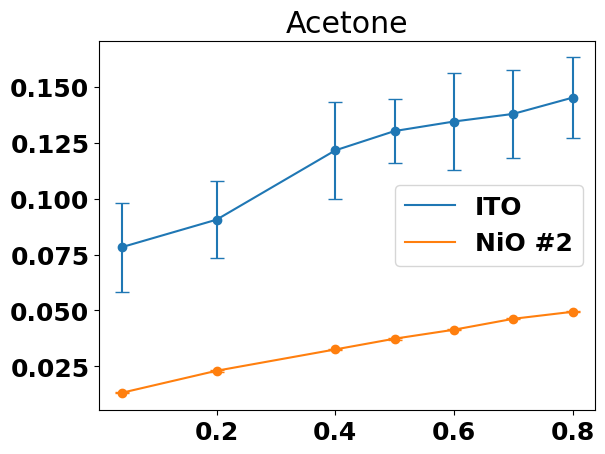

In [96]:
acetone=[0.04,0.2,0.4,0.5,0.6,0.7,0.8]
plt.plot(acetone, conc_ito_data.iloc[:,0], label='ITO')
plt.plot(acetone, conc_nio_data.iloc[:,0], label='NiO #2')
plt.errorbar(acetone, conc_ito_data.iloc[:,0], yerr=conc_ito_std.iloc[:,0], fmt='o', capsize=5, color='#1f77b4')
plt.errorbar(acetone, conc_nio_data.iloc[:,0], yerr=conc_nio_std.iloc[:,0], fmt='o', capsize=5, color='#ff7f0e')
plt.title('Acetone')
plt.legend()